In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

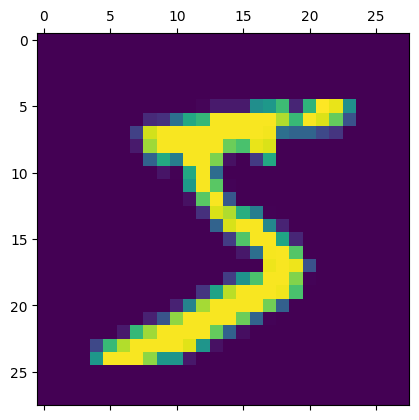

In [9]:
plt.matshow(x_train[0])

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.3680 - accuracy: 0.0887
loss=2.368
Accuracy=0.089


In [ ]:
#Making Prediction on new data

<function matplotlib.pyplot.show(close=None, block=None)>

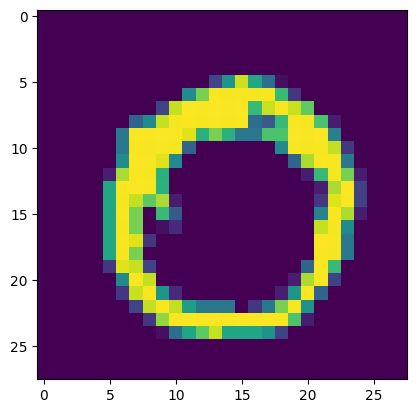

In [16]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [18]:
test_predict = model.predict(x_test)


313/313 [==============================] - 0s 2ms/step


In [20]:
test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test,predictions=test_predict_labels)
print('confusion matrix of the test set:\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
confusion matrix of the test set:
 tf.Tensor(
[[  0   0  19   0 324 117  52  93 268 107]
 [  0   5  73  78  18 570   8   3 178 202]
 [  0   2  95  31  90 537   6  66  57 148]
 [  0   0 108  97  99 324 111  19  93 159]
 [  0   2  36  13  89 483  30  23  19 287]
 [  0   4  36   7 109 194  79  23 303 137]
 [  0   1  52   1 179 516   8  50  24 127]
 [  0   1  68   6 158 401  62  49  58 225]
 [  0   0  58  22  74 560  27  13  76 144]
 [  0   0  16   7 158 497  21  12  24 274]], shape=(10, 10), dtype=int32)
